In [28]:
import pandas as pd

# Ubah file csv menjadi dataframe
df = pd.read_csv('dataset/Mall_Customers.csv')

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [29]:
# ubah nama kolom
df = df.rename(
    columns={
        "Gender": "gender",
        "Age": "age",
        "Annual Income (k$)": "annual_income",
        "Spending Score (1-100)": "spending_score"
    }
)

# ubah data kategori menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [30]:
from sklearn.cluster import KMeans

# menghitung kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
  km_result = KMeans(n_clusters=i).fit(X)
  clusters.append(km_result.inertia_)

Text(0, 0.5, 'Inertia')

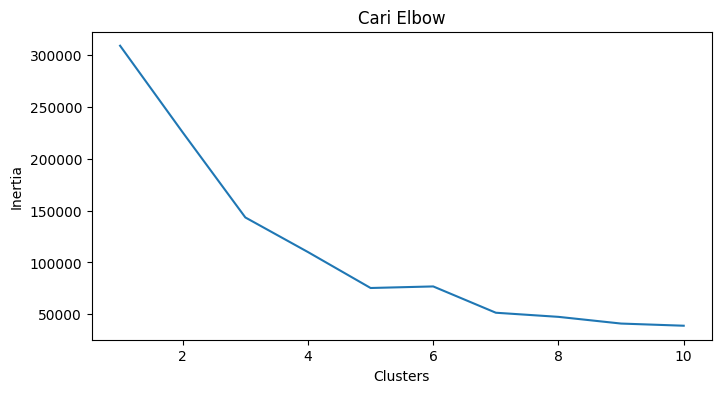

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

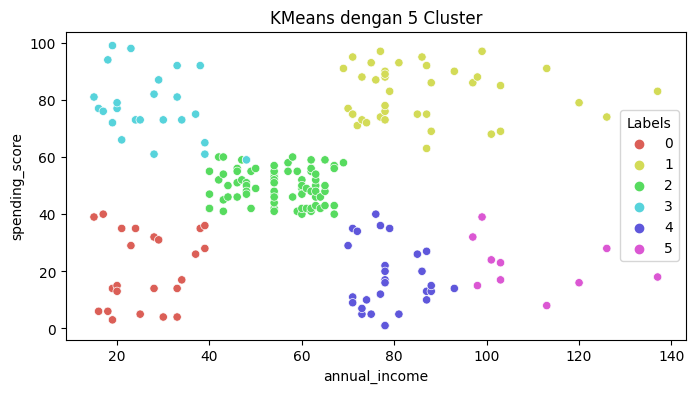

In [33]:
# membuat objek KMeans
km5 = KMeans(n_clusters=6).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 6))
plt.title('KMeans dengan 5 Cluster')
plt.show()
